In [1]:
%matplotlib inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, Function, functions
import matplotlib.pyplot as plt
import numpy as np
import graphviz

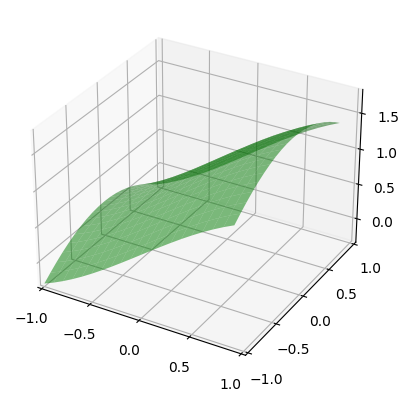

In [58]:
# Ground truth
x0 = np.arange(-1, 1, 0.1)
x1 = np.arange(-1, 1, 0.1)
x0, x1 = np.meshgrid(x0, x1)
y_truth = np.sin(x0) + np.cos(x1)

ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(-1, 1.01, 0.5))
ax.set_yticks(np.arange(-1, 1.01, 0.5))
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='green', alpha=0.5)
plt.show()

In [59]:
rng = check_random_state(0)
eps = 1e-4
# Training samples
X_train = rng.uniform(-1, 1, 1000).reshape(500,2) + eps 
y_train = np.sin(X_train[:,0] ) + np.cos(X_train[:,1]) + eps

# Testing samples
X_test = rng.uniform(-1, 1, 1000).reshape(500,2) + eps
y_test = np.sin(X_test[:,0]) + np.cos(X_test[:,1]) + eps

## Symbolic Classification

In [60]:
function_set = ['add','sub', 'mul','div','sqrt','log','abs','neg','inv','max','min','sin','cos','tan']
est_gp = SymbolicRegressor(population_size=10000,
                           generations=10,function_set=function_set, stopping_criteria=0.01,
                           p_crossover=0.6, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.2, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.59           7.9023        6        0.0909052         0.101981      2.40m
   1     5.33         0.775218        6           0.0001           0.0001      1.65m


SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos',
                                'tan'],
                  generations=10, max_samples=0.9, p_crossover=0.6,
                  p_hoist_mutation=0.2, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=10000, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [61]:
print(est_gp._program)

add(sin(X0), cos(abs(X1)))


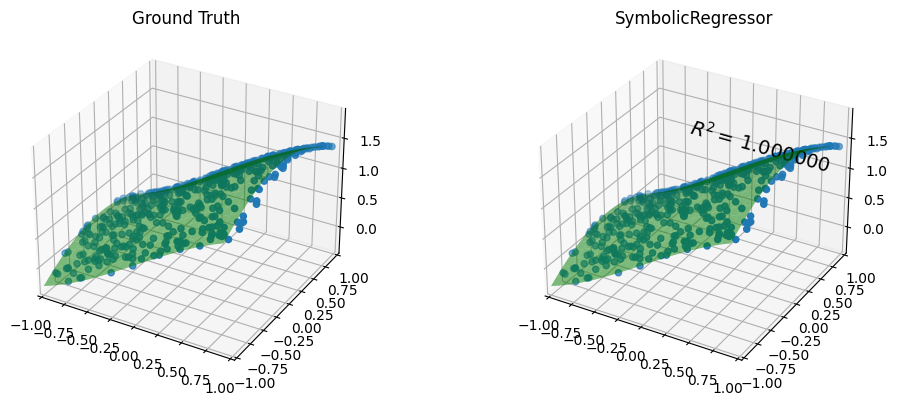

In [62]:
y_gp = est_gp.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
score_gp = est_gp.score(X_test, y_test)

fig = plt.figure(figsize=(12, 10))

for i, (y, score, title) in enumerate([(y_truth, None, "Ground Truth"),
                                       (y_gp, score_gp, "SymbolicRegressor")]):

    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    surf = ax.plot_surface(x0, x1, y, rstride=1, cstride=1, color='green', alpha=0.5)
    points = ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
    if score is not None:
        score = ax.text(-.7, 1, .2, "$R^2 =\/ %.6f$" % score, 'x', fontsize=14)
    plt.title(title)
plt.show()

## Symbolic Transformer

In [63]:
from gplearn.genetic import SymbolicTransformer
from sklearn.utils import check_random_state
import numpy as np

Ground Truth:
For now I have taken function for example i.e. (y =  exp(x0**2 + x1**2)) in which both are in range of (-1,1,0.1)
x0 and x1 are two independent features and y1 is a target.

In [64]:
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                'abs', 'neg', 'inv', 'max', 'min','tan','cos','sin']
gp = SymbolicTransformer(generations=10, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0)
gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.29         0.173477       11         0.983119         0.980942     33.69s
   1    10.02           0.5582        5          0.99858         0.998898     30.10s
   2     4.43         0.801411        5                1                1     21.72s


SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min', 'tan',
                                  'cos', 'sin'],
                    generations=10, max_samples=0.9,
                    parsimony_coefficient=0.0005, population_size=2000,
                    random_state=0, verbose=1)

In [65]:
print(gp._best_programs[0])

add(cos(X1), neg(neg(sin(X0))))
